# Linear Regression Analysis

## Setup

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline 

In [2]:
# Load data
data = pd.read_csv('data/Ames_MLR.csv')

In [3]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [10]:
# Check the columns in predictors
column_names = predictors.columns.tolist()
for column in column_names:
    print(column)


GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
YearsSinceBuilt
YearsSinceRemod
Crisis
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_None
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSewr
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Neighborhood_Mitchel
N

## Key Assumptions of Linear Regression

Linear Regression has several key assumptions:
1. **Linearity** - there should be a linear relationship between the independent (predictor) variables and the dependent (response) variable
2. **Independence of Errors** - residuals should be independent of each other with no correlation
3. **Homoscedasticity** - residuals should have constant variance across the range of predicted values
4. **Normality of errors** - residuals should be approximiately normally distributed
5. **No or little multicollinearity** - independent variables should not be highly correlated with each other

## Check for Multicollinearity

We will check for multicollinearity first given the large number of features

In [11]:
# Get the list of all numeric or ordinal categorical features

numeric_features = ['GrLivArea',                # Above grade (ground) living area square feet
                    'LotFrontage',              # Linear feet of street connected to property
                    'LotArea',                  # Lot size in square feet
                    'MasVnrArea',               # Masonry veneer area in square feet
                    'BsmtFinSF1',               # Type 1 finished square feet
                    'BsmtFinSF2',               # Type 2 finished square feet
                    'BsmtUnfSF',                # Unfinished square feet of basement area
                    'TotalBsmtSF',              # Total square feet of basement area
                    '1stFlrSF',                 # First Floor square feet
                    '2ndFlrSF',                 # Second floor square feet
                    'LowQualFinSF',             # Low quality finished square feet (all floors)
                    'GarageArea',               # Size of garage in square feet
                    'WoodDeckSF',               # Wood deck area in square feet
                    'OpenPorchSF',              # Open porch area in square feet
                    'EnclosedPorch',            # Enclosed porch area in square feet
                    '3SsnPorch',                # Three season porch area in square feet
                    'ScreenPorch',              # Screen porch area in square feet
                    'PoolArea',                 # Pool area in square feet
                    'MiscVal'                   # $Value of miscellaneous feature
                    ]

ordinal_features = ['OverallQual',              # Rates the overall material and finish of the house (1 is very poor, 10 is very excellent)
                    'OverallCond',              # Rates the overall condition of the house (1 is very poor, 10 is very excellent)
                    'BsmtFullBath',             # Basement full bathrooms
                    'BsmtHalfBath',             # Basement half bathrooms
                    'FullBath',                 # Full bathrooms above grade
                    'HalfBath',                 # Half baths above grade
                    'BedroomAbvGr',             # Bedrooms above grade (does NOT include basement bedrooms)
                    'KitchenAbvGr',             # Kitchens above grade
                    'TotRmsAbvGrd',             # Total rooms above grade (does not include bathrooms)
                    'Fireplaces',               # Number of fireplaces
                    'GarageYrBlt',              # Year garage was built
                    'GarageCars',               # Size of garage in car capacity
                    'MoSold',                   # Month Sold (MM)
                    'YrSold',                   # Year Sold (YYYY)
                    'YearsSinceBuilt',          # Latest date - original construction date
                    'YearsSinceRemod',          # Latest date - remodel date (same as construction date if no remodeling or additions)
                    'Crisis'                    # 1 if after July 2007, 0 otherwise
                    ]

all_quantitative_features = numeric_features + ordinal_features


# num_ord_cols = ['GrLivArea',
#  'MSSubClass',
#  'LotFrontage',
#  'LotArea',
#  'OverallQual',
#  'OverallCond',
#  'MasVnrArea',
#  'BsmtFinSF1',
#  'BsmtFinSF2',
#  'BsmtUnfSF',
#  'TotalBsmtSF',
#  '1stFlrSF',
#  '2ndFlrSF',
#  'LowQualFinSF',
#  'BsmtFullBath',
#  'BsmtHalfBath',
#  'FullBath',
#  'HalfBath',
#  'BedroomAbvGr',
#  'KitchenAbvGr',
#  'TotRmsAbvGrd',
#  'Fireplaces',
#  'GarageYrBlt',
#  'GarageCars',
#  'GarageArea',
#  'WoodDeckSF',
#  'OpenPorchSF',
#  'EnclosedPorch',
#  '3SsnPorch',
#  'ScreenPorch',
#  'PoolArea',
#  'MiscVal',
#  'MoSold',
#  'YrSold',
#  'NeighborhoodCostIndex',
#  'YearsSinceBuilt',
#  'YearsSinceRemod',
#  'Crisis']

In [12]:
# Select only these columns
predictors_all_quant = predictors[all_quantitative_features]

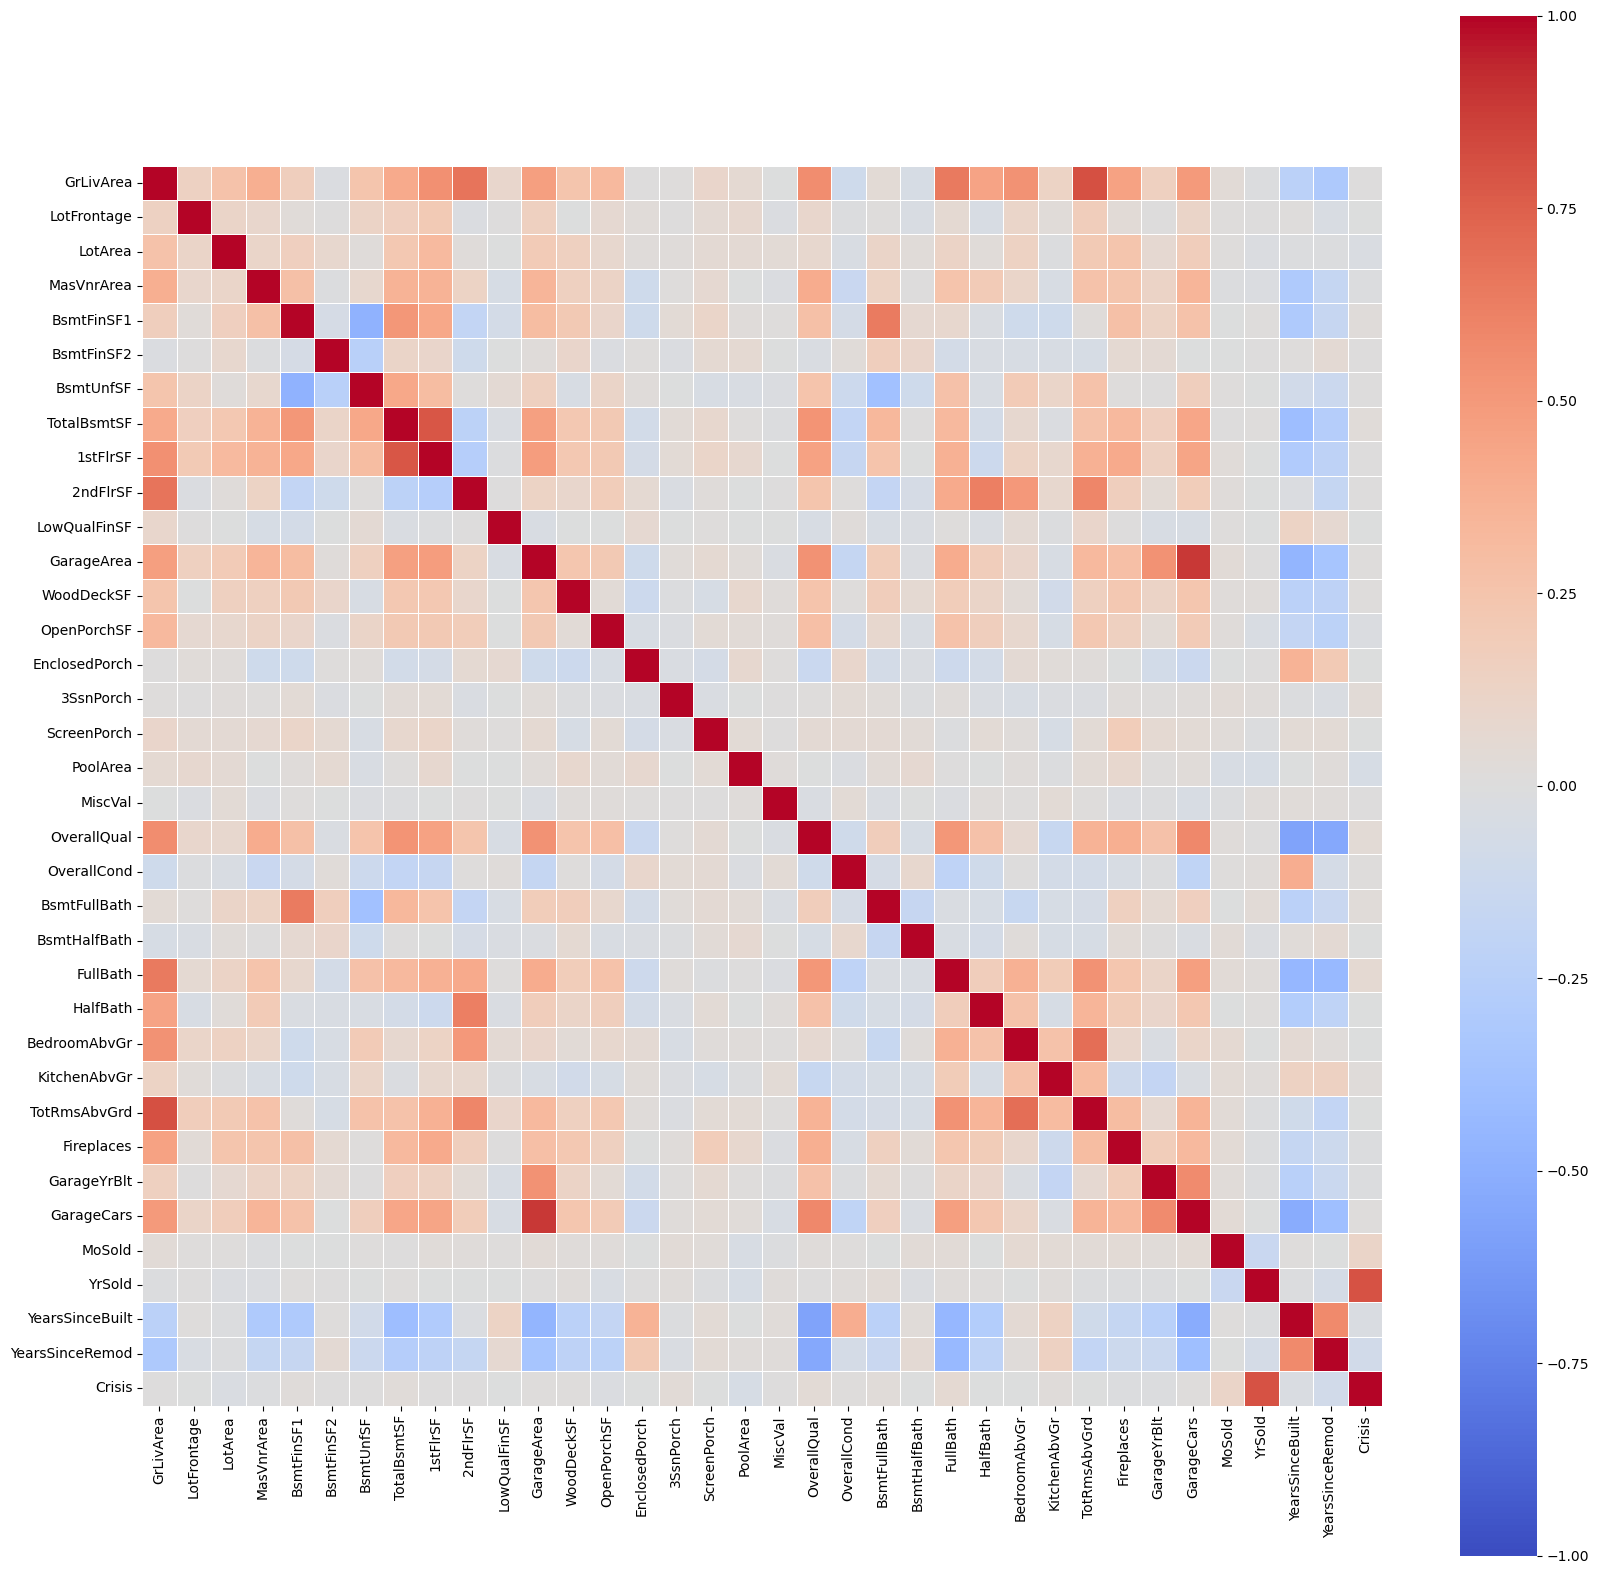

In [13]:
# Plot the correlation matrix
correlation_matrix = predictors_all_quant.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm', fmt='.2f', vmax=1.0, vmin=-1.0, linewidths=0.5)
plt.show()

In [14]:
# Calculate the variance inflation factor (VIF) for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(predictors_all_quant.values, i) 
              for i in range(predictors_all_quant.shape[1])]

# Print the column names and their VIF values
vif = vif.assign(Feature=predictors_all_quant.columns)
vif.sort_values(by='VIF', ascending=False, inplace=True)
print(vif)

           VIF          Feature
0          inf        GrLivArea
8          inf         1stFlrSF
10         inf     LowQualFinSF
9          inf         2ndFlrSF
4          inf       BsmtFinSF1
5          inf       BsmtFinSF2
6          inf        BsmtUnfSF
7          inf      TotalBsmtSF
32  159.153113           YrSold
27   81.330656     TotRmsAbvGrd
19   60.949561      OverallQual
20   41.065329      OverallCond
30   40.790278       GarageCars
26   39.267117     KitchenAbvGr
29   33.710596      GarageYrBlt
11   32.568061       GarageArea
25   31.002652     BedroomAbvGr
23   25.203473         FullBath
33   10.195050  YearsSinceBuilt
31    6.496250           MoSold
34    5.777741  YearsSinceRemod
1     4.238709      LotFrontage
21    3.608946     BsmtFullBath
24    3.460636         HalfBath
2     3.076825          LotArea
28    2.926242       Fireplaces
35    2.867442           Crisis
12    1.903864       WoodDeckSF
3     1.806094       MasVnrArea
13    1.779906      OpenPorchSF
14    1.

/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Feature Selection

Given the significant presence of multicollinearity, we will build the feature set "bottoms up."  We will use the analysis previously performed in EDA to select these.

In [28]:
# Show linear relationship between the target and selected featuers

# Create linear regression object
lr = LinearRegression()

# 1. Location Features

# 'Neighborhood' - show linear regression for encoded Neighborhood
neighborhood_columns = [col for col in predictors.columns if col.startswith('Neighborhood')]
lr.fit(predictors[neighborhood_columns], target)
print("Neighborhood (one-hot encoded) R^2 score: ", lr.score(predictors[neighborhood_columns], target))

# 'Condition1' - show linear regression for encoded Condition1
condition1_columns = [col for col in predictors.columns if col.startswith('Condition1')]
lr.fit(predictors[condition1_columns], target)
print("Condition1 (one-hot encoded) R^2 score: ", lr.score(predictors[condition1_columns], target))

# 2. Size Features

# 'LotArea' - show linear regression for LotArea
lr.fit(predictors[['LotArea']], target)
print("LotArea R^2 score: ", lr.score(predictors[['LotArea']], target))

# 'GrLivArea' - show linear regression for GrLivArea
lr.fit(predictors[['GrLivArea']], target)
print("GrLivArea R^2 score: ", lr.score(predictors[['GrLivArea']], target))

# 'TotRmsAbvGrd' - show linear regression for TotRmsAbvGrd
lr.fit(predictors[['TotRmsAbvGrd']], target)
print("TotRmsAbvGrd R^2 score: ", lr.score(predictors[['TotRmsAbvGrd']], target))

# 3. Age and Remodeling Features

# 'YearsSinceBuilt' - show linear regression for YearsSinceRemod
lr.fit(predictors[['YearsSinceBuilt']], target)
print("YearsSinceBuilt R^2 score: ", lr.score(predictors[['YearsSinceBuilt']], target))

# 'YearsSinceRemod' - show linear regression for YearsSinceRemod
lr.fit(predictors[['YearsSinceRemod']], target)
print("YearsSinceRemod R^2 score: ", lr.score(predictors[['YearsSinceRemod']], target))

# 'MiscVal' - show linear regression for MiscVal
lr.fit(predictors[['MiscVal']], target)
print("MiscVal R^2 score: ", lr.score(predictors[['MiscVal']], target))

# 4. Quality Features

# 'OverallQual' - show linear regression for OverallQual
lr.fit(predictors[['OverallQual']], target)
print("OverallQual R^2 score: ", lr.score(predictors[['OverallQual']], target))

# 'OverallCond' - show linear regression for OverallCond
lr.fit(predictors[['OverallCond']], target)
print("OverallCond R^2 score: ", lr.score(predictors[['OverallCond']], target))

# 5. Economic Factors

# 'Crisis' - show linear regression for Crisis
lr.fit(predictors[['Crisis']], target)
print("Crisis R^2 score: ", lr.score(predictors[['Crisis']], target))

Neighborhood (one-hot encoded) R^2 score:  0.5598045031837189
Condition1 (one-hot encoded) R^2 score:  0.045311043746464774
LotArea R^2 score:  0.07531013997565805
GrLivArea R^2 score:  0.5183711142112821
TotRmsAbvGrd R^2 score:  0.24030189701253812
YearsSinceBuilt R^2 score:  0.2965550613346397
YearsSinceRemod R^2 score:  0.2649366345406384
MiscVal R^2 score:  0.0003560420870245551
OverallQual R^2 score:  0.6251450369427116
OverallCond R^2 score:  0.010225789793399054
Crisis R^2 score:  0.0002456458842525766


To create a parsimonious model, we'll only pick the features that seem to show high correlation to the target variable

In [60]:
# Gather selected featuers
selected_features_small = pd.concat([predictors[neighborhood_columns],
                                    predictors[['GrLivArea']],
                                    predictors[['YearsSinceBuilt']],
                                    predictors[['OverallQual']]],
                                    axis=1
                                    )

print(selected_features_small.columns)


Index(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'GrLivArea', 'YearsSinceBuilt', 'OverallQual'],
      dtype='object')


#### Check for Multicollinearity

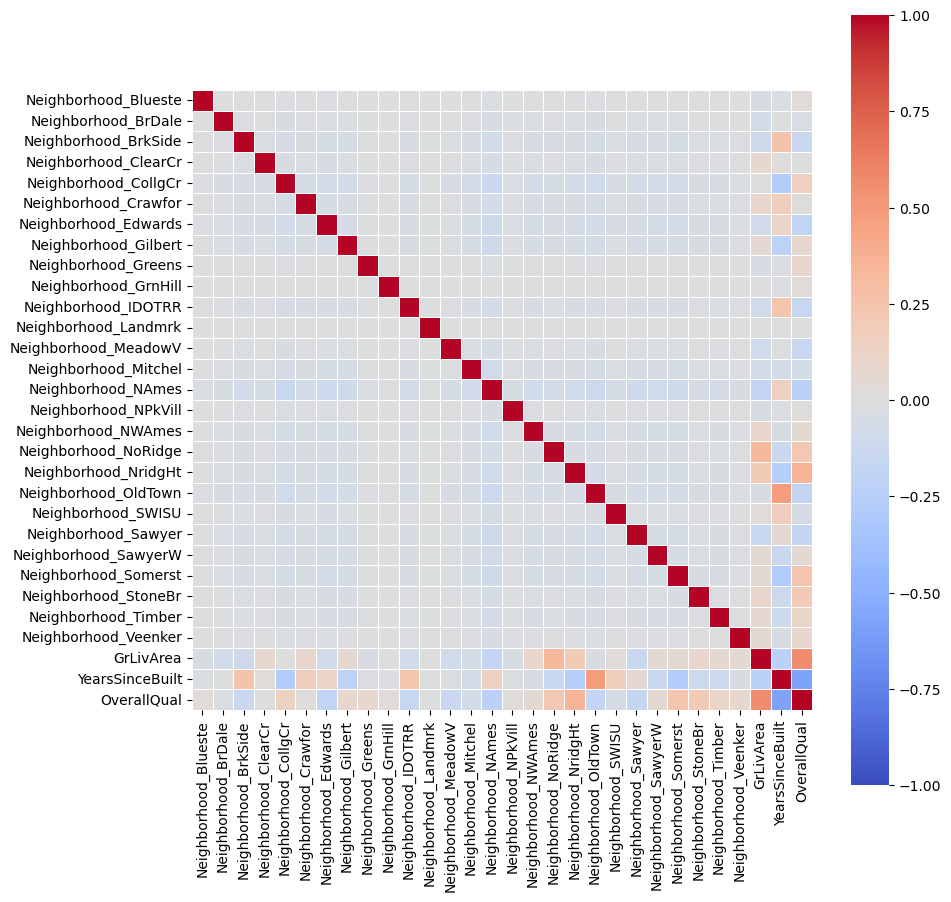

In [61]:
# Plot the correlation matrix
correlation_matrix = selected_features_small.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm', fmt='.2f', vmax=1.0, vmin=-1.0, linewidths=0.5)
plt.show()

In [62]:
# Calculate the VIF for each feature in the selected_features DataFrame
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(selected_features_small.values, i)
              for i in range(selected_features_small.shape[1])]

# Add the feature names to the VIF DataFrame
vif['Feature'] = selected_features_small.columns

# Sort the VIF DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF DataFrame
print(vif)

          VIF               Feature
29  40.114797           OverallQual
27  17.763000             GrLivArea
28  13.030542       YearsSinceBuilt
14   7.427202    Neighborhood_NAmes
19   6.869868  Neighborhood_OldTown
4    4.332664  Neighborhood_CollgCr
6    3.561074  Neighborhood_Edwards
18   3.500884  Neighborhood_NridgHt
2    3.410119  Neighborhood_BrkSide
23   3.387041  Neighborhood_Somerst
5    3.148504  Neighborhood_Crawfor
16   3.023634   Neighborhood_NWAmes
7    2.980857  Neighborhood_Gilbert
21   2.946756   Neighborhood_Sawyer
10   2.823020   Neighborhood_IDOTRR
22   2.618142  Neighborhood_SawyerW
17   2.477069  Neighborhood_NoRidge
13   2.258711  Neighborhood_Mitchel
20   2.054017    Neighborhood_SWISU
24   1.918220  Neighborhood_StoneBr
25   1.883158   Neighborhood_Timber
3    1.690850  Neighborhood_ClearCr
26   1.431477  Neighborhood_Veenker
1    1.419754   Neighborhood_BrDale
15   1.345551  Neighborhood_NPkVill
12   1.337418  Neighborhood_MeadowV
8    1.188552   Neighborhood

Multicollinearity has improved, but we still have some high values, so the caveat is that the model's predictions may not be reliable.  We'll address this via regularization in later modules.

## Split Data into Train-Test Sets

In [63]:
# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_small, target, test_size=0.2, random_state=0)

## Train Model

In [64]:
# Use cross-validation on train data
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Average 5-Fold CV Score: {np.mean(cross_val_scores)}")

Average 5-Fold CV Score: 0.7936466880223177


In [65]:
# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [66]:
# Display the metrics
print('R^2 on test set is equal to %.3f' %(lr.score(X_test, y_test)))
print('The intercept is equal to %.3f' %(lr.intercept_))
print('The slopes are %s' %(lr.coef_))

R^2 on test set is equal to 0.811
The intercept is equal to -19043.193
The slopes are [-1.67287579e+04 -3.35569644e+04  7.91428737e+03  3.12054574e+04
  9.21568180e+03  3.08418089e+04  4.13198018e+03 -5.47589302e+03
  9.28600555e+03  9.13084269e+04 -1.64342317e+03 -2.84426630e+04
 -1.20947850e+04  1.13478627e+04  8.48612758e+03 -1.91424955e+04
  4.04326361e+03  5.25739313e+04  6.49356657e+04  1.19156800e+03
 -1.25424450e+04  1.15568526e+04 -4.48274619e+03  1.53908174e+04
  7.09976855e+04  3.30493337e+04  4.10260680e+04  5.86629932e+01
 -4.37498697e+02  1.90813638e+04]


Text(0.5, 1.0, 'Distribution of Residuals')

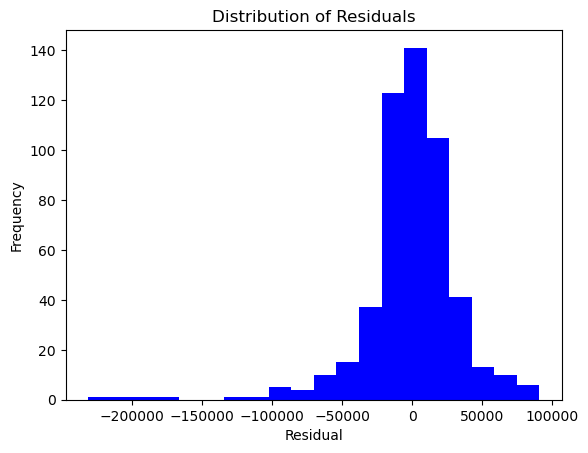

In [44]:
# Plot Distribution of Residuals

# Calculate the predictions on the test set
predictions = lr.predict(X_test)

# Calculate the residuals
residuals = predictions - y_test

# Plot a histogram of the residuals
plt.hist(residuals, bins=20, color='blue')

# Labels and title
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

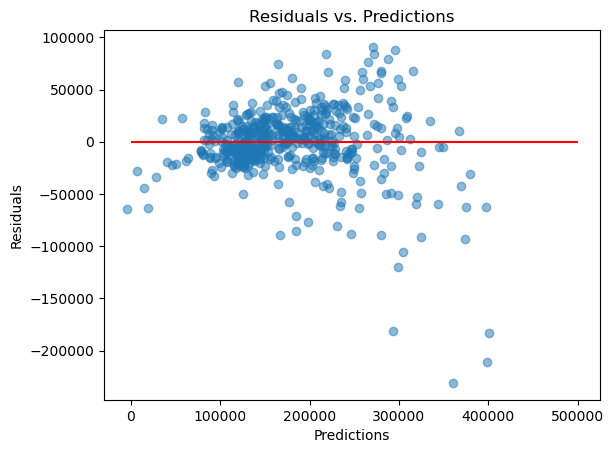

In [43]:
# Plot Residuals vs. Predictions

# Create the plot
plt.scatter(predictions, residuals, alpha=0.5)

# Labels and title
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')

# Draw a horizontal line at y = 0
plt.hlines(y=0, xmin=0, xmax=500000, color='red')

# Show the plot
plt.show()

## Conclusion

We are able to get a decently accurate model using only four predictors:
- 'Neighborhood', one hot encoded
- 'GrLivArea'
- 'YearsSinceBuilt'
- 'OverallQual'

Our mantra could basically be: "Location, Size, Age, Condition!"

We will use this as a "baseline" for accuracy and interpretability for other ML models.

<br>
<br>


> **"Einstein said something along the lines of 'Make things as simple as possible, and no simpler.'  That's probably Rule Number 1 of modelling.**  
> **Rule Number 2 would be 'If you are going to make things more complicated then do so one new feature at a time.'**  
> **Already that's a big difference to machine learning in which one tends to throw in everything at the start, including the kitchen sink."**  
>
> Paul Wilmott, *Machine Learning: An Applied Mathematics Introduction*